In [2]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import numpy as np
#import seaborn as sns
import re
import time
import math
import re
#from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
#import gensim
#from gensim import corpora, models
#from gensim.models.ldamulticore import LdaMulticore
#import pyLDAvis.gensim
import warnings
warnings.simplefilter('ignore')
import os
os.chdir(r'C:\Users\annie\Documents\Autumn 19\NLP\Final Project\news_chicago_il')
pd.set_option('display.max_colwidth', -1)

In [3]:
data = pd.read_pickle('news_chicago_il.pkl')
data.head(1) 
#data.shape (49122, 4)

,crawled_date,language,text,title
0,2019-10-31,english,"News October 31st, 2019 by Ric Hanson\nCEDAR RAPIDS, Iowa (AP) — Authorities say an Illinois man was targeted and fatally shot at an eastern Iowa convenience store. The shooting was reported a little before 8 a.m. Wednesday at a Kum & Go in Cedar Rapids. Officers soon found the wounded man, and he was rushed to a hospital. Police say he died at 4:40 a.m. Thursday. He’s been identified as 27-year-old Reginald Ward Jr., who lived in Moline, Illinois. Investigators think Ward was specifically targeted. Police are looking for a car seen leaving the store. No arrests have been reported. Community Hub","Police say Illinois man targeted, killed in eastern Iowa"


In [4]:
#selecting english articles only 
data = data[data['language']=='english']
#data.shape (49122, 4)
data.isnull().sum() #no nulls

crawled_date    0
language        0
text            0
title           0
dtype: int64

In [5]:
data= data[['title','text']]
data.head(1)

,title,text
0,"Police say Illinois man targeted, killed in eastern Iowa","News October 31st, 2019 by Ric Hanson\nCEDAR RAPIDS, Iowa (AP) — Authorities say an Illinois man was targeted and fatally shot at an eastern Iowa convenience store. The shooting was reported a little before 8 a.m. Wednesday at a Kum & Go in Cedar Rapids. Officers soon found the wounded man, and he was rushed to a hospital. Police say he died at 4:40 a.m. Thursday. He’s been identified as 27-year-old Reginald Ward Jr., who lived in Moline, Illinois. Investigators think Ward was specifically targeted. Police are looking for a car seen leaving the store. No arrests have been reported. Community Hub"


In [23]:
data[data['text']==''] # 0

,title,text


In [6]:
data['wordcount']=data['text'].apply(lambda x:len(str(x).split(" "))) #words in each article
data.head(3)

title  \
0  Police say Illinois man targeted, killed in eastern Iowa      
1  Chicago teachers strike continues with tentative contract     
2  KnowThis: Trump vs. Chicago & Relentless Fires Rage in Cali   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [25]:
data['wordcount'].describe()

count    49122.000000
mean     381.729816  
std      540.273568  
min      1.000000    
25%      68.000000   
50%      229.000000  
75%      543.000000  
max      16556.000000
Name: wordcount, dtype: float64

In [26]:
bins =pd.cut(data['wordcount'],[0,500,1000,5000,10000,17000])
bins.value_counts()

(0, 500]          35438
(500, 1000]       10202
(1000, 5000]      3420 
(5000, 10000]     44   
(10000, 17000]    18   
Name: wordcount, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E42F22EAC8>]],
      dtype=object)

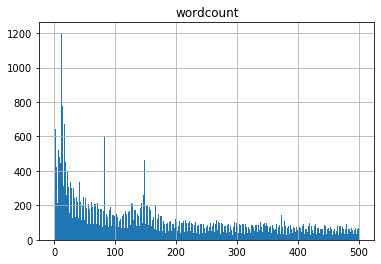

In [27]:
import matplotlib.pyplot as plt
raw=data.copy()
raw= raw[raw['wordcount']<=500]
raw.hist(bins=300) #some weird spikes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E42F3A9DC8>]],
      dtype=object)

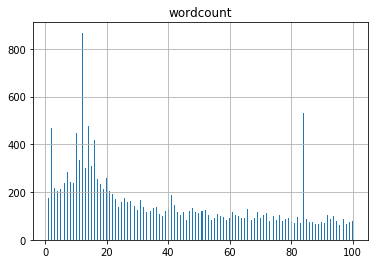

In [28]:
raw= raw[raw['wordcount']<=100]
raw.hist(bins=300) #remove all articles with less than 20 words. And investigage the 500 articles with the same word count!

In [29]:
data= data[data['wordcount']>20]
#data.shape (42730, 3)
data[data['wordcount']==84].count() #531
data[data['wordcount']==84]

,title,text,wordcount
21,Amarres de amor en 24 Horas - 773 372-8457 (chicago),"Amarres de amor en 24 Horas - 773 372-8457 (chicago, Illinois, USA) Posted on: Thursday, 31 October, 2019 Expires On: Saturday, 30 November, 2019 Reply to: (Not Shown)\nNo sufra mas el amor de su vida estara a su lado, no lo dudes mas, podermos ayudarlo. #Domine o #Amarre a su ser amado. http://botanicavirgenmorena.com/ » **** Amarres De Amor efectivos ¡Llamanos Hoy! ****(773) 372-8457 Botanica Virgen Morena 3151 W. 26th St. Chicago IL. 60623 It is NOT ok to contact this poster with commercial interests.",84
76,"""Chicago Med"" We're Lost in the Dark - English (1CD ) - subtitles","To download our subtitles, install Chrome extension ; click on 1. "" Add to Chrome "" 2. "" Add Extension "" If you install our extension you will remove all ads and waiting time on this website Thank you !\nTo download our subtitles, install Firefox add-on ; click on 1. "" Add to Firefox "" 2. "" Add "" If you install our extension you will remove all ads and waiting time on this website Thank you ! Your download will start in seconds",84
77,"""Chicago Med"" Never Going Back to Normal - English (1CD ) - subtitles","To download our subtitles, install Chrome extension ; click on 1. "" Add to Chrome "" 2. "" Add Extension "" If you install our extension you will remove all ads and waiting time on this website Thank you !\nTo download our subtitles, install Firefox add-on ; click on 1. "" Add to Firefox "" 2. "" Add "" If you install our extension you will remove all ads and waiting time on this website Thank you ! Your download will start in seconds",84
122,"""Chicago P.D."" Doubt - Bulgarian (1CD ) - subtitles","To download our subtitles, install Chrome extension ; click on 1. "" Add to Chrome "" 2. "" Add Extension "" If you install our extension you will remove all ads and waiting time on this website Thank you !\nTo download our subtitles, install Firefox add-on ; click on 1. "" Add to Firefox "" 2. "" Add "" If you install our extension you will remove all ads and waiting time on this website Thank you ! Your download will start in seconds",84
124,"""Chicago P.D."" False Positive - English (1CD ) - subtitles","To download our subtitles, install Chrome extension ; click on 1. "" Add to Chrome "" 2. "" Add Extension "" If you install our extension you will remove all ads and waiting time on this website Thank you !\nTo download our subtitles, install Firefox add-on ; click on 1. "" Add to Firefox "" 2. "" Add "" If you install our extension you will remove all ads and waiting time on this website Thank you ! Your download will start in seconds",84
...,...,...,...
48528,"Series: RCONSTINM683SFRBCHI, Contributions to the Chicago Fed Relative Midwest Economy Index: Indiana Contribution: Construction Sector","Indiana's construction sector to the Relative Midwest Economy Index (RMEI). This series is the weighted average of state variables measuring based on construction sector indicators for the Indiana.A RMEI by the state of Indiana construction sector, a rate historically consistent with the growth of the national economy, whereas positive values indicate above-average relative contribution; and negative values indicate below average relative contribution.For further information about the Relative Midwest Relative Midwest Economy Index: Indiana Contribution: Construction Sector [RCONSTINM683SFRBCHI], //fred.stlouisfed.org/series/RCONSTINM683SFRBCHI, October 31, 2019. RELEASE TABLES",84
48529,"Series: RCONSTILM683SFRBCHI, Contributions to the Chicago Fed Relative Midwest Economy Index: Illinois Contribution: Construction Sector","Illinois' construction sector to the Relative Midwest Economy Index (RMEI). This series is the weighted average of state variables measuring based on construction sector indicators for the Illinois.A RMEI by the state of Illinois construction sector, a rate historically consistent with the growth of the national economy, whereas positive values indic

In [30]:
#duplicated records
data[data['text'].duplicated(keep=False)].sort_values('text').head(8)
#data.shape (40901, 3)

title  \
34388  The Media Notepad: Chicago stations cover teachers’ strike                                                               
33703  The Media Notepad: Chicago stations cover teachers’ strike                                                               
10107  Chicago Police Superintendent Eddie Johnson retiring, ending turbulent three-year period as city's top cop | KVOA.com    
28634  Chicago teachers to strike after failing to reach contract deal with nation's third-largest school district | KVOA.com   
9349   DePaul handles the University of Chicago 84-55 for their second win of the season                                        
33895  Saints dominate Bears in Chicago, Teddy Bridgewater improves to 5-0 as starter                                           
46080  The Viking Raiders brutalize “The Chicago Cubs”: Raw, Oct. 28, 2019 | FOX Sports                                         
5042   Big Ten Week 10: Michigan back on track, Illinois & Indiana stay red hot                                                 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [31]:
data.drop_duplicates(subset='text', keep='first', inplace=True)

In [32]:
print('Unique articles:',len(np.unique(data['text'].index)))

Unique articles: 40901


In [42]:
#remove all articles that do not mention the words Chicago or Illinois
words = ['population','Population','Illinois','illinois','Chicago','chicago']
data= data[data['text'].str.contains('|'.join(words))]
#data.shape #(36488, 3)

### Topic Modelling

In [34]:
# Remove special characters to avoid problems with analysis
raw=data.copy()
data['text_clean']= data['text'].map(lambda x: re.sub('[^a-zA-Z@ . , : - _]', '', str(x)))#re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


news_list = data['text_clean'].tolist()
news_list[:1]
news_clean = [clean(doc).split() for doc in news_list]
#print(*news_clean[:1], sep='\n\n')

#### LDA Topic Modelling

In [35]:
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim
from gensim import corpora, models
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim

In [36]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(news_clean)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
%time doc_term_matrix = [dictionary.doc2bow(doc) for doc in news_clean]
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

Wall time: 649 ms


In [37]:
numtopics = 10
%time ldamodel = LdaMulticore(doc_term_matrix, num_topics=numtopics, id2word = dictionary, passes=50)
print(*ldamodel.print_topics(num_topics=numtopics, num_words=3), sep='\n\n')

Wall time: 6min 15s
(0, '0.012*"illinois" + 0.006*"university" + 0.006*"new"')

(1, '0.011*"illinois" + 0.010*"said" + 0.006*"year"')

(2, '0.021*"illinois" + 0.017*"tax" + 0.017*"state"')

(3, '0.015*"uf" + 0.013*"setigerum" + 0.011*"tu"')

(4, '0.008*"chicago" + 0.008*"people" + 0.007*"american"')

(5, '0.012*"health" + 0.009*"job" + 0.009*"medical"')

(6, '0.034*"school" + 0.030*"teacher" + 0.020*"student"')

(7, '0.015*"afghanistan" + 0.015*"chicago" + 0.010*"year"')

(8, '0.013*"g" + 0.011*"chicago" + 0.007*"community"')

(9, '0.016*"chicago" + 0.009*"city" + 0.007*"said"')


In [38]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display)

In [39]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution,Keywords and Sentiment for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                blob=TextBlob(str(wp))
                Sentiment=blob.sentiment.subjectivity
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

    # Add original text to the end of the output
    
df_topic_sents_keywords = format_topics_sentences(ldamodel, doc_term_matrix, news_list)
Sentiment_list=[]
blob=TextBlob(str(news_list))
for sentence in blob.sentences:
    Sentiment_list.append(analyser.polarity_scores(str(sentence)))
    #Sentiment_list.append(sentence.sentiment.polarity)
Sentiment=pd.DataFrame.from_dict(Sentiment_list)
Sentiment = Sentiment['compound'].astype(float)

df_topic_sents_keywords = pd.concat([df_topic_sents_keywords,Sentiment],axis=1)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Text','Sentiment']

# Show
df_dominant_topic.head(5)

#Reference:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#:~:targetText=Topic%20Modeling%20with%20Gensim%20(Python),in%20the%20Python's%20Gensim%20package.

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0  0            9.0             0.4942               
1  1            0.0             0.5716               
2  2            2.0             0.9992               
3  3            2.0             0.4553               
4  4            9.0             0.5814               

                                                                        Keywords  \
0  chicago, city, said, police, people, state, would, year, one, new               
1  illinois, university, new, year, said, study, professor, state, college, one    
2  illinois, tax, state, city, pension, percent, chicago, year, said, population   
3  illinois, tax, state, city, pension, percent, chicago, year, said, population   
4  chicago, city, said, police, people, state, would, year, one, new               

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [40]:
from statistics import mean
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')
sent_mean=df_dominant_topic.groupby('Dominant_Topic')['Sentiment'].mean()
for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)
# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num',"Topic_Perc_Contrib", "Keywords", "Text", 'Avg Sentiment']
sent_topics_sorteddf_mallet.drop(['Text'],axis=1,inplace=True)
# Show
sent_topics_sorteddf_mallet.head(20)

,Topic_Num,Topic_Perc_Contrib,Keywords,Avg Sentiment
0,0.0,0.9995,"illinois, university, new, year, said, study, professor, state, college, one",-0.4215
1,1.0,0.9994,"illinois, said, year, chicago, people, state, center, bill, population, u",0.5423
2,2.0,0.9993,"illinois, tax, state, city, pension, percent, chicago, year, said, population",0.0000
3,3.0,0.9999,"uf, setigerum, tu, plant, somniferum, may, hybrid, drug, coold, bracteatum",0.0000
4,4.0,0.9996,"chicago, people, american, illinois, u, age, state, obama, year, arab",0.4939
5,5.0,0.9991,"health, job, medical, experience, work, program, patient, care, service, research",0.6705
6,6.0,0.9989,"school, teacher, student, said, chicago, union, strike, education, district, special",-0.4404
7,7.0,0.9987,"afghanistan, chicago, year, country, people, homicide, city, killing, rent, insurgent",0.0000
8,8.0,0.9990,"g, chicago, community, year, speed, care, carrier, city, child, said",0.4019
9,9.0,0.9990,"chicago, city, said, police, people, state, would, year, one, new",0.0000


In [41]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords','Avg Sentiment']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords','Avg Sentiment', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Avg Sentiment,Num_Documents,Perc_Documents
0.0,0.0,"illinois, university, new, year, said, study, professor, state, college, one",-0.4215,62,0.0568
1.0,1.0,"illinois, said, year, chicago, people, state, center, bill, population, u",0.5423,101,0.0925
2.0,2.0,"illinois, tax, state, city, pension, percent, chicago, year, said, population",0.0000,190,0.1740
3.0,3.0,"uf, setigerum, tu, plant, somniferum, may, hybrid, drug, coold, bracteatum",0.0000,12,0.0110
4.0,4.0,"chicago, people, american, illinois, u, age, state, obama, year, arab",0.4939,135,0.1236
5.0,5.0,"health, job, medical, experience, work, program, patient, care, service, research",0.6705,143,0.1310
6.0,6.0,"school, teacher, student, said, chicago, union, strike, education, district, special",-0.4404,189,0.1731
7.0,7.0,"afghanistan, chicago, year, country, people, homicide, city, killing, rent, insurgent",0.0000,38,0.0348
8.0,8.0,"g, chicago, community, year, speed, care, carrier, city, child, said",0.4019,50,0.0458
9.0,9.0,"chicago, city, said, police, people, state, would, year, one, new",0.0000,172,0.1575


#### TF-IDF Topic Modelling

#### Using TextBlob functionality to create TF-IDF function

In [28]:
# http://stevenloria.com/finding-important-words-in-a-document-using-tf-idf/

def tf(word, blob):
    return blob.words.count(word) / len(blob.words)
# tf(word, blob) computes "term frequency" which is the number of times a word appears in a document blob, 
# normalized by dividing by the total number of words in blob. We use TextBlob for breaking up the text into words 
# and getting the word counts.


def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)
# n_containing(word, bloblist) returns the number of documents containing word. 
# A generator expression is passed to the sum() function.


def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
# idf(word, bloblist) computes "inverse document frequency" which measures how common a word is 
# among all documents in bloblist. The more common a word is, the lower its idf. 
# We take the ratio of the total number of documents to the number of documents containing word, 
# then take the log of that. Add 1 to the divisor to prevent division by zero
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)
# tfidf(word, blob, bloblist) computes the TF-IDF score. It is simply the product of tf and idf.

In [31]:
raw=data.copy()
#raw['text'] = raw['text'].map(lambda x: re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))
data['text_clean'] = [clean(doc).split() for doc in data['text_clean']]
bloblist = []
del bloblist[:]

for i  in range(0,len(raw)):
    bloblist.append(TextBlob(str(data['text_clean'].iloc[i])))
    
len(bloblist) 

36458

In [32]:
for i, blob in enumerate(bloblist):
# Print top 5 values
    if i == 5:
        break
    print("Top words in news article {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:10]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in news article 1
	Word: 'cedar, TF-IDF: 0.18151
	Word: 'rapid, TF-IDF: 0.13957
	Word: 'ward, TF-IDF: 0.12938
	Word: 'targeted, TF-IDF: 0.11522
	Word: 'kum, TF-IDF: 0.11294
	Word: 'reginald, TF-IDF: 0.10723
	Word: 'iowa, TF-IDF: 0.10322
	Word: 'ric, TF-IDF: 0.10318
	Word: 'hanson, TF-IDF: 0.0987
	Word: '440, TF-IDF: 0.08893
Top words in news article 2
	Word: 'school, TF-IDF: 0.07164
	Word: 'strike, TF-IDF: 0.04636
	Word: 'teacher, TF-IDF: 0.03907
	Word: 'sharkey, TF-IDF: 0.03661
	Word: 'union, TF-IDF: 0.03393
	Word: 'wednesday, TF-IDF: 0.03236
	Word: 'lightfoot, TF-IDF: 0.03072
	Word: 'said, TF-IDF: 0.03044
	Word: 'agreement, TF-IDF: 0.02966
	Word: 'day, TF-IDF: 0.0248
Top words in news article 3
	Word: 'knowthis, TF-IDF: 0.05694
	Word: 'kincade, TF-IDF: 0.04006
	Word: 'trump, TF-IDF: 0.03817
	Word: 'fire, TF-IDF: 0.03477
	Word: 'wildfire, TF-IDF: 0.03234
	Word: 'albaghdadi, TF-IDF: 0.03178
	Word: 'lyft, TF-IDF: 0.02937
	Word: 'isi, TF-IDF: 0.02792
	Word: 'transportation, TF-

### KMeans clustering using TFIDF 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

raw['text'] = [clean(doc).split() for doc in data['text_clean']]
raw['text']= raw['text'].map(lambda x: re.sub('[^a-zA-Z@ . , : - _]', '', str(x)))#re.sub('[^a-zA-Z0-9 @ . , : - _]', '', str(x)))

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,#tokenizer=textblob_tokenizer,
                             max_features =5000,max_df=0.7,min_df=50,use_idf=True)
tf_idf = tf_idf_vectorizor.fit_transform(raw['text'])
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()
pd.DataFrame(tf_idf.toarray(), columns=tf_idf_vectorizor.get_feature_names())

,ability,able,abreu,academic,academy,access,according,account,achieve,act,...,write,writing,written,wrote,yearold,yelena,yes,york,young,youre
0,0.000000,0.000000,0.0,0.000000,0.0,0.096102,0.055423,0.000000,0.0,0.033079,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.031716,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.132672,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,0.013695,0.026549,0.0,0.000000,0.0,0.000000,0.018393,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.017088
3,0.048481,0.000000,0.0,0.000000,0.0,0.021170,0.065115,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.069797,0.000000,0.000000,0.061292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0.000000,0.028360,0.0,0.000000,0.0,0.025552,0.000000,0.000000,0.0,0.035180,...,0.0,0.217637,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1088,0.000000,0.029519,0.0,0.038894,0.0,0.026597,0.020451,0.000000,0.0,0.000000,...,0.0,0.056634,0.0,0.0,0.0,0.0,0.000000,0.000000,0.035204,0.000000
1089,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.207811,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1090,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.018602,0.033406,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [25]:
clusters = 20
model = KMeans(n_clusters=clusters)
model.fit(tf_idf_array)
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = tf_idf_vectorizor.get_feature_names()

In [27]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()
for i in range(clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
data['cluster'] = model.labels_

'''for i in range(clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])'''

Top terms per cluster:
Cluster 0: student school percent college enrollment
Cluster 1: teacher union strike school ctu
Cluster 2: average home price list village
Cluster 3: age bureau statistical people bracket
Cluster 4: school teacher student said strike
Cluster 5: tax pension illinois government state
Cluster 6: market company business investment food
Cluster 7: job experience program il usa
Cluster 8: medical clinical health outcome healthcare
Cluster 9: sen drug hearing trauma model
Cluster 10: country war attack murder died
Cluster 11: research university illinois center science
Cluster 12: teacher special school education said
Cluster 13: patient care medical health hospital
Cluster 14: illinois state city river said
Cluster 15: average price home list condostownhomes
Cluster 16: degree percent illinois distribution older
Cluster 17: book american history black mayor
Cluster 18: said people new community city
Cluster 19: police city trump said department


'for i in range(clusters):\n    print("Cluster %d:" % i),\n    for ind in order_centroids[i, :10]:\n        print(\' %s\' % terms[ind])'

### Named Entity Recognition

In [15]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize
import os

# Change the path according to your system
stanford_classifier = os.getenv('STANFORD_CLASSIFIER')
stanford_ner_path = os.getenv('STANFORD_NER_PATH')

# Creating Tagger Object
st = StanfordNERTagger(stanford_classifier, stanford_ner_path, encoding='utf-8')

In [162]:
entities = []
labels = []
for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(str(text))), binary = False):
    if hasattr(chunk, 'label'):
        entities.append(' '.join(c[0] for c in chunk)) #Add space as between multi-token entities
        labels.append(chunk.label())

entities_labels = list(set(zip(entities, labels))) #unique entities

In [156]:
text=data['text']
tokenized_text = word_tokenize(str(text))
classified_text = st.tag(tokenized_text)

In [18]:
netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)

In [163]:
entities_all = list(zip(entities, labels))
entities_unique = list(set(zip(entities, labels))) #unique entities   

In [165]:
entities_df = pd.DataFrame(entities_unique)
entities_df.columns = ["Entities", "Labels"]

In [166]:
Org_df = entities_df.loc[entities_df["Labels"].isin(['ORGANIZATION'])]
person_df=entities_df.loc[entities_df["Labels"].isin(['PERSON'])]
person_df.head(5)

,Entities,Labels
2,Mayor Lightfoot,PERSON
6,Ray Hanania,PERSON
7,Blue Moon Light Sky,PERSON
10,Daley,PERSON
11,Eileen T.,PERSON


### Sentiment Analysis 

In [167]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(str(data['text']))
print (b_sentences[10:15])

[Sentence("A fire in December 2017 lit up the same area and forced drivers into a horrifying, apocalyptic-looking morning commute .\nHere’s the latest:\nOfficials are still investigating the source of both fires, though Pacific Gas and Electric (PG&E) has told state regulators one of its power lines malfunctioned, which may have started the Kincade Fire."), Sentence("PG&E is also being criticized for how it handled preemptively cutting off power to 1.3 million California residents."), Sentence("The utility company did it to avoid the possibility of more downed power lines, but many customers complained that they weren’t given enough notice and that the lack of power — which has now lasted for days — is incredibly disruptive, especially to low-income and elderly communities ."), Sentence("There have been 200,000 evacuations in Sonoma County because of the Kincade Fire, which has grown to 66,200 acres, or about the size of Sacramento."), Sentence("The Kincade fire is expected to burn for

In [168]:
person_list=person_df['Entities'].astype(str).values.flatten().tolist()
org_list=Org_df['Entities'].astype(str).values.flatten().tolist()

In [203]:
person_sentences=[]
person=[]
org_sentences=[]
p_polarity = []
p_subjectivity = []
org=[]
o_polarity = []
o_subjectivity = []
sentences = []
for sentence in blob.sentences:
    for word in person_list:
        if word in sentence:#    if (any(map(lambda word: word in sentence, person_list))):
            person.append(word)
            person_sentences.append(sentence.raw)
            p_polarity.append(sentence.sentiment.polarity)
            p_subjectivity.append(sentence.sentiment.subjectivity)
        #sentences.append(str(sentence.raw))
    for word in org_list:
        if word in sentence:  
            org.append(word)
            org_sentences.append(sentence.raw)
            o_polarity.append(sentence.sentiment.polarity)
            o_subjectivity.append(sentence.sentiment.subjectivity)
        #sentences.append(str(sentence.raw))
        
person_df=pd.DataFrame()
person_df['sentence'] = person_sentences
person_df['person'] = person
person_df['polarity'] = p_polarity
person_df['subjectivity'] = p_subjectivity
person_df['sentence'] = person_df['sentence'].str.replace('\n', ' ')
      
Org_df=pd.DataFrame()
Org_df['Org'] = org
Org_df['sentence'] = org_sentences
Org_df['polarity'] = o_polarity
Org_df['subjectivity'] = o_subjectivity
Org_df['sentence'] = Org_df['sentence'].str.replace('\n', ' ')

In [215]:
person_df['label'] = 0
person_df.loc[person_df['polarity'] > 0.2, 'label'] = 'Positive'
person_df.loc[person_df['polarity'] < -0.2, 'label'] = 'Negative'
Org_df['label'] = 0
Org_df.loc[Org_df['polarity'] > 0.2, 'label'] = 'Positive'
Org_df.loc[Org_df['polarity'] < -0.2, 'label'] = 'Negative'


In [208]:
person_df[['person','sentence','label',]][person_df['label'] == 'Positive'].head(20) #duplication

,person,sentence,label
79,Illinois,There is no single city that perfectly exemplifies Illinois' pension predicament.,Positive
118,Cunningham,"I would feel like a jerk if I wasn't able to provide for their retirement after they put in their blood, sweat, tears and love into the city,"" Cunningham said.",Positive
119,Naperville,"Naperville, for instance, puts more money into the two funds than is required and has been able to maintain the police system at 77 percent funded and the firefighters at 75 percent.",Positive
135,Chicago,"• This story was produced by the Better Government Association, a nonprofit news organization based in Chicago.",Positive
141,Abrahamson,"This caused many institutions to increase the cost of tuition to make up for the loss.\n“When you cut education, you don’t cut the costs, you just shift the costs from the state to institutions, then from the institutions to students,” said Michael Abrahamson, policy analyst at PCC.",Positive
142,Michael,"This caused many institutions to increase the cost of tuition to make up for the loss.\n“When you cut education, you don’t cut the costs, you just shift the costs from the state to institutions, then from the institutions to students,” said Michael Abrahamson, policy analyst at PCC.",Positive
143,Michael Abrahamson,"This caused many institutions to increase the cost of tuition to make up for the loss.\n“When you cut education, you don’t cut the costs, you just shift the costs from the state to institutions, then from the institutions to students,” said Michael Abrahamson, policy analyst at PCC.",Positive
252,Straz,"Combined, his two challengers, Julie Corsi and Robert Straz received more than 4,000 votes with Straz winning with 2,803 votes (60.4 percent of the votes cast).",Positive
253,Julie Corsi,"Combined, his two challengers, Julie Corsi and Robert Straz received more than 4,000 votes with Straz winning with 2,803 votes (60.4 percent of the votes cast).",Positive
254,Robert Straz,"Combined, his two challengers, Julie Corsi and Robert Straz received more than 4,000 votes with Straz winning with 2,803 votes (60.4 percent of the votes cast).",Positive


In [212]:
Org_df[['Org','sentence','label',]][Org_df['label'] == 'Positive'].head(20)

Org  \
35   ISIS                  
85   Illinois              
108  Better                
109  Chicago               
117  PCC                   
216  Muslims               
217  Muslim                
274  UN                    
275  No                    
276  Chicago               
277  Dingell Introduces    
299  UNICEF                
300  UN                    
365  kerningcultures.com   
366  Kerning Cultures      
367  Cultures              
375  America               
376  American              
548  CEO                   
580  Illinois              

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [213]:
#remove  duplication
Org_df.drop_duplicates(subset='sentence', keep='first', inplace=True)
person_df.drop_duplicates(subset='sentence', keep='first', inplace=True)

In [216]:
Org_df[['Org','sentence','label',]][Org_df['label'] == 'Positive'].head(20)

,Org,sentence,label
27,National Bureau,The National Bureau of Economic Research published a paper studying “fine particulate pollution” and showing that it increased 5.5% from 2016 to 2018 in the U.S. after decreasing almost 25% in the 8 years prior.,Positive
35,ISIS,"U.S. forces have been searching for the ISIS leader for years, naming him one of the most wanted terrorists in the world.",Positive
54,Trump,"While many of the protesters held signs supporting impeachment, Trump called the ongoing inquiry a “scam” and compared it to actor Jussie Smollett’s case.",Positive
58,Chicago Teachers Union,"Luckily, in this city, we know the truth and we will not let anyone — no matter how high the office — denigrate who we are as a people or our status as a welcoming city.”\nKnowThis: Today marks the 8th day of the Chicago Teachers Union strike .",Positive
60,Unemployed,President Trump did not mention it in his remarks.\nLyft Will Offer Free Rides For Unemployed People To Go To Job Interviews Lyft is offering free or discounted rides to job interviews across the U.S. and Canada as part of its newly launched Jobs Access Program.,Positive
77,Better,"- In Illinois' 28 largest cities beyond Chicago -- those with populations of 50,000 or more -- the rate of pension payment increases has outstripped the growth of property tax revenue by a factor of about 10 since 2012, a Better Government Association review of financial and pension documents shows.",Positive
80,Illinois,Illinois has imposed a structure for police and firefighter pensions that is inherently inefficient but also distinct from the problems facing the statewide funds.,Positive
85,Illinois,There is no single city that perfectly exemplifies Illinois' pension predicament.,Positive
86,Illinois,"National surveys have shown Illinois near the top in terms of property taxes, mostly the result of the state being near the bottom in supporting public education.",Positive
99,Illinois,"What's more, the obstacles are rooted in the demographic and economic disparities that define Illinois, a state where nine out of 10 counties are losing population and job growth is increasingly gravitating to metropolitan Chicago.",Positive


In [217]:
person_df[['person','sentence','label',]][person_df['label'] == 'Positive'].head(20) #analysis not so good

,person,sentence,label
33,Jussie Smollett,"While many of the protesters held signs supporting impeachment, Trump called the ongoing inquiry a “scam” and compared it to actor Jussie Smollett’s case.",Positive
41,Luckily,"Luckily, in this city, we know the truth and we will not let anyone — no matter how high the office — denigrate who we are as a people or our status as a welcoming city.”\nKnowThis: Today marks the 8th day of the Chicago Teachers Union strike .",Positive
43,Jobs Access Program,President Trump did not mention it in his remarks.\nLyft Will Offer Free Rides For Unemployed People To Go To Job Interviews Lyft is offering free or discounted rides to job interviews across the U.S. and Canada as part of its newly launched Jobs Access Program.,Positive
55,Lyft,"It’s ultimately just a social justice issue.” You can hear her speak about it more in our exclusive congressional town hall from last week — watch the replay here .\nKnowThis: According to a company study of its own riders, Lyft found that 44% of rides start or end in low-income area.",Positive
74,Illinois,"- In Illinois' 28 largest cities beyond Chicago -- those with populations of 50,000 or more -- the rate of pension payment increases has outstripped the growth of property tax revenue by a factor of about 10 since 2012, a Better Government Association review of financial and pension documents shows.",Positive
76,Illinois,Illinois has imposed a structure for police and firefighter pensions that is inherently inefficient but also distinct from the problems facing the statewide funds.,Positive
79,Illinois,There is no single city that perfectly exemplifies Illinois' pension predicament.,Positive
80,Illinois,"National surveys have shown Illinois near the top in terms of property taxes, mostly the result of the state being near the bottom in supporting public education.",Positive
97,Kass,"""If total revenue isn't keeping pace with the year-to-year increase,"" Kass said about the strain on municipalities, ""we know that more revenue is having to be devoted to making pension payments.",Positive
99,Illinois,"What's more, the obstacles are rooted in the demographic and economic disparities that define Illinois, a state where nine out of 10 counties are losing population and job growth is increasingly gravitating to metropolitan Chicago.",Positive


In [281]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

person_sentences=[]
person=[]
org_sentences=[]
p_sentiment = []
org=[]
o_sentiment = []
for sentence in blob.sentences:
    for word in person_list:
        if word in sentence:
            person.append(word)
            person_sentences.append(sentence.raw)
            p_sentiment.append(analyser.polarity_scores(str(sentence)))
            
    for word in org_list:
        if word in sentence:  
            org.append(word)
            org_sentences.append(sentence.raw)
            o_sentiment.append(analyser.polarity_scores(str(sentence)))

odf=pd.DataFrame.from_dict(o_sentiment)
pdf= pd.DataFrame.from_dict(p_sentiment)       
person_df=pd.DataFrame()
person_df['sentence'] = person_sentences
person_df['person'] = person
person_df['Sentiment'] = pdf['compound'].astype(float)
person_df['sentence'] = person_df['sentence'].str.replace('\n', ' ')
      
Org_df=pd.DataFrame()
Org_df['Org'] = org
Org_df['sentence'] = org_sentences
Org_df['Sentiment'] = odf['compound'].astype(float)
Org_df['sentence'] = Org_df['sentence'].str.replace('\n', ' ')

In [291]:
Org_df.drop_duplicates(subset='sentence', keep='first', inplace=True)
person_df.drop_duplicates(subset='sentence', keep='first', inplace=True)

In [301]:
person_df[['person','sentence','Sentiment']][person_df['Sentiment'] >=0.6].head(20)

person  \
29   Johnson               
41   Luckily               
43   Jobs Access Program   
49   Lyft                  
55   Lyft                  
56   Erik Doersching       
74   Illinois              
86   Reid Ottesen          
104  Rockford              
157  Illinois              
158  Illinois              
201  Muslim                
221  Muslim                
247  Koldenhoven           
271  Arabs                 
300  Kennedy               
314  Award                 
317  Muslim                
319  Muslim                
323  Ray Hanania           

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [302]:
Org_df[['Org','sentence','Sentiment']][Org_df['Sentiment'] >=0.6].head(20)

Org  \
52   Chicago                   
58   Chicago Teachers Union    
60   Unemployed                
64   Lighthouse Pointe         
77   Better                    
92   Illinois                  
102  McNamara                  
130  PCC                       
132  Illinois                  
160  Eid                       
179  Muslims                   
196  Chicago                   
211  Chicago                   
226  Illinois                  
230  State                     
234  Eid                       
237  Muslim                    
240  America                   
264  MT Mehdi Courage          
265  Chicago Newspaper Guild   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        